## CHAPTER 5
---
# PERFORMING VARIABLE DISCRETIZATION

---
- Discretization, or **binning**, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. 
- Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models.
- How does discretization minimize the effect of outliers? Discretization places outliers into the lower or higher intervals, together with the remaining inlier values of the distribution.
- Hence, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bin. 
- Also, if sorting observations across bins with equal frequency, discretization spreads the values of a skewed variable more homogeneously across the value range.
- In this chapter, we will discuss supervised and unsupervised approaches to transform continuous variables into discrete ones. 
    - Unsupervised discretization methods do not use any information, other than the variable distribution, to create the contiguous bins.
    - Supervised methods, on the other hand, use target information to create the intervals.

## 5.1 Dividing the variable into intervals of equal width

- In equal-width discretization, the variable values are sorted into intervals of the same width. 
- The number of intervals is decided arbitrarily and the width is determined by the range of values of the variable and the number of bins to create, so for the variable X, the interval width is given as follows: ${Width} = \frac{Max(X) - Min(X)}{Bins}$
- For example, if the values of the variable vary between 0 and 100, we can create five bins like this: width = (100-0) / 5 = 20; the bins will be 0-20, 20-40, 40-60, 80-100. 
- The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers, that is, values under 0 or greater than 100 would be placed in those bins as well, by extending the limits to minus and plus infinity.
- In this section, we will carry out equal-width discretization using Pandas and Scikit-Learn.

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

#### Equal-width discretization with pandas

In [4]:
# determine the interval edges or limits
lstat_range = X_train['LSTAT'].max() - X_train['LSTAT'].min()
lstat_range

35.25

In [5]:
# divide the range into 10 equal-width bins
lstat_range / 10

3.525

In [6]:
# capture the lower and upper boundaries
min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

# round the bin width
inter_width = int(lstat_range / 10)
min_value, max_value, inter_width

(1, 37, 3)

In [7]:
# capture the interval limits
intervals = [i for i in range(min_value, max_value+inter_width, inter_width)]
intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [8]:
# discretise LSTAT
X_train['lstat_disc'] = pd.cut(x=X_train['LSTAT'],
                               bins=intervals,
                               include_lowest=True)

X_train[['LSTAT', 'lstat_disc']].head(10)

,LSTAT,lstat_disc
141,34.41,"(34.0, 37.0]"
272,7.73,"(7.0, 10.0]"
135,16.96,"(16.0, 19.0]"
298,4.97,"(4.0, 7.0]"
122,17.93,"(16.0, 19.0]"
22,18.72,"(16.0, 19.0]"
68,13.09,"(13.0, 16.0]"
20,21.02,"(19.0, 22.0]"
437,26.45,"(25.0, 28.0]"
14,10.26,"(10.0, 13.0]"


In [9]:
# check the number of observations per bin
X_train['lstat_disc'].value_counts()

(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(16.0, 19.0]    45
(13.0, 16.0]    44
(0.999, 4.0]    28
(19.0, 22.0]    21
(22.0, 25.0]    17
(28.0, 31.0]     9
(25.0, 28.0]     7
(34.0, 37.0]     4
(31.0, 34.0]     0
Name: lstat_disc, dtype: int64

Text(0, 0.5, 'Number of observations per bin')

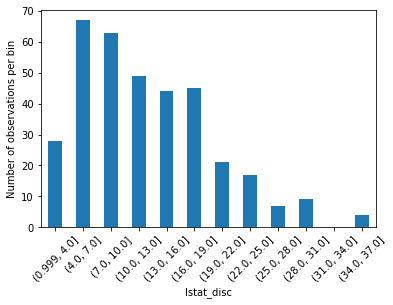

In [10]:
# plot the number of observations per bin
X_train.groupby('lstat_disc')['LSTAT'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [11]:
# let's discretise the variables in the test set
X_test['lstat_disc'] = pd.cut(x=X_test['LSTAT'],
                              bins=intervals,
                              include_lowest=True)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,"(7.0, 10.0]"
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,"(7.0, 10.0]"
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,"(10.0, 13.0]"
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,"(19.0, 22.0]"
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,"(10.0, 13.0]"


If the distributions in train and test set are similar, we should expect similar proportion of observations in the different intervals in the train and test set let's see that below

Text(0, 0.5, 'Number of observations per bin')

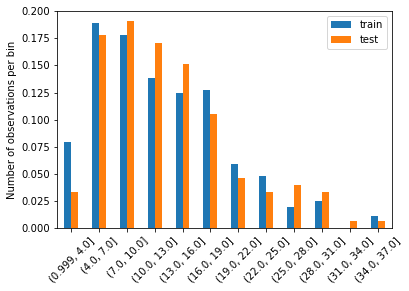

In [12]:
# determine proportion of observations in each bin
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### Equal-width discretization with Scikit-Learn

In [13]:
# training and testing set are already separated
X_train.shape, X_test.shape

((354, 14), (152, 14))

In [14]:
# set up an equal-width discretizer into 10 intervals
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# fit the discretizer
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

# check the interval limits
disc.bin_edges_

array([array([ 1.73 ,  5.255,  8.78 , 12.305, 15.83 , 19.355, 22.88 , 26.405,
       29.93 , 33.455, 36.98 ]),
       array([ 1.1742 ,  2.26943,  3.36466,  4.45989,  5.55512,  6.65035,
        7.74558,  8.84081,  9.93604, 11.03127, 12.1265 ]),
       array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
       7.7362, 8.2581, 8.78  ])], dtype=object)

In [15]:
# let's transform the train set
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# transform array to dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,2.0
1,1.0,2.0,5.0
2,4.0,0.0,5.0
3,0.0,6.0,5.0
4,4.0,0.0,4.0


In [16]:
# same thing for test set
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

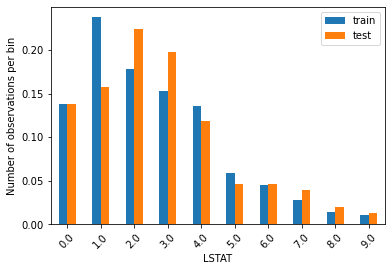

In [17]:
# LSTAT
t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

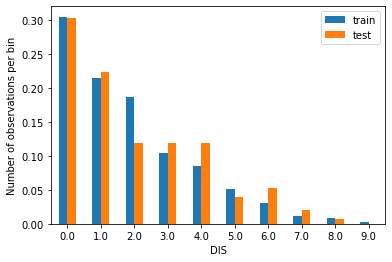

In [18]:
# DIS
t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

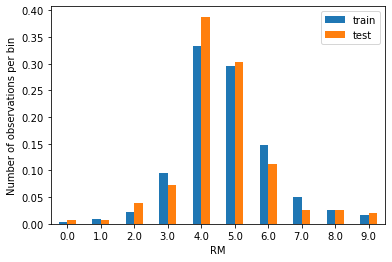

In [19]:
# RM
t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## 5.2 Sorting the variable values in intervals of equal frequency

- Equal-frequency discretization divides the values of the variable into intervals that carry the same proportion of observations. 
- The interval width is determined by quantiles, and therefore different intervals may have different widths. 
- In summary, equal-frequency discretization using quantiles consists of dividing the continuous variable into N quantiles, with N to be defined by the user. 
- This discretization technique is particularly useful for skewed variables as it spreads the observations over the different bins equally. 
- In this section, we will perform equal-frequency discretization using Pandas and Scikit-Learn.

In [20]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
X_train.shape, X_test.shape

((354, 14), (152, 14))

#### Equal-frequency discretization with pandas
- The interval limits are the quantile limits. 
- We can find those out with pandas qcut.
- Let's get 10 bins
- **retbins = True** indicates that we want to capture the limits of the intervals

In [23]:
X_train['lstat_disc'], intervals = pd.qcut(
    X_train['LSTAT'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

In [24]:
# look at the result
X_train[['LSTAT', 'lstat_disc']].head(10)

,LSTAT,lstat_disc
141,34.41,"(22.453, 36.98]"
272,7.73,"(7.528, 9.5]"
135,16.96,"(15.565, 18.06]"
298,4.97,"(4.623, 6.202]"
122,17.93,"(15.565, 18.06]"
22,18.72,"(18.06, 22.453]"
68,13.09,"(11.16, 13.26]"
20,21.02,"(18.06, 22.453]"
437,26.45,"(22.453, 36.98]"
14,10.26,"(9.5, 11.16]"


In [25]:
# check the percentage of observations per interval (about the same)
X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(22.453, 36.98]    0.101695
(15.565, 18.06]    0.101695
(13.26, 15.565]    0.101695
(1.729, 4.623]     0.101695
(11.16, 13.26]     0.098870
(6.202, 7.528]     0.098870
(4.623, 6.202]     0.098870
(18.06, 22.453]    0.096045
(9.5, 11.16]       0.096045
Name: lstat_disc, dtype: float64

To discretise LSTAT in the test set, we use pandas cut() instead of qcut()

In [26]:
X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins=intervals)

# check the percentage of observations per interval
X_test['lstat_disc'].value_counts() / len(X_test)

(7.528, 9.5]       0.131579
(22.453, 36.98]    0.118421
(13.26, 15.565]    0.118421
(11.16, 13.26]     0.111842
(15.565, 18.06]    0.098684
(4.623, 6.202]     0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: lstat_disc, dtype: float64

In [27]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,"(22.453, 36.98]"
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,"(7.528, 9.5]"
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,"(15.565, 18.06]"
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,"(4.623, 6.202]"
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,"(15.565, 18.06]"


Text(0, 0.5, 'Number of observations per bin')

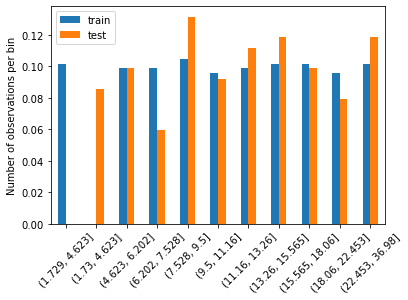

In [28]:
# determine proportion of observations per interval
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### Equal-frequency discretization with Scikit-Learn

In [29]:
X_train.shape, X_test.shape

((354, 14), (152, 14))

In [30]:
# set up a discretizer (10 bins)
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit the discretizer 
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

# get the interval edges 
disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ]),
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
        3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ]),
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
       6.794 , 7.185 , 8.78  ])], dtype=object)

In [31]:
# let's transform the train set
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


In [32]:
# let's do the same for the test set
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

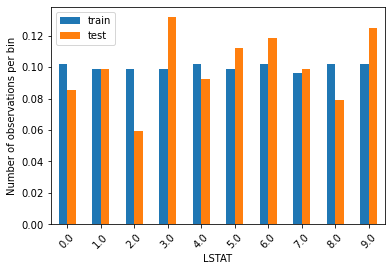

In [33]:
# LSTAT
t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

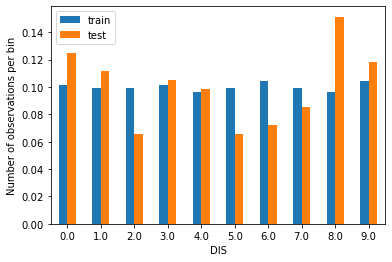

In [34]:
# DIS
t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

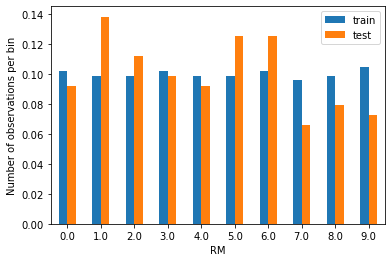

In [35]:
# RM
t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## 5.3 Performing discretization followed by categorical encoding

- After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. 
- If treated as categorical, we can follow up the discretization by reordering the intervals according to the target value, as we did in the *Encoding with integers in an ordered manner* section in Chapter 3 to create a monotonic relationship between the intervals and the target. 
- In this section, we will combine these two feature engineering techniques using Feature-engine 

In [36]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# from feature-engine
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [37]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
X_train.shape, X_test.shape

((354, 14), (152, 14))

#### Equal-frequency discretization with Feature-engine

Text(0, 0.5, 'mean of survived')

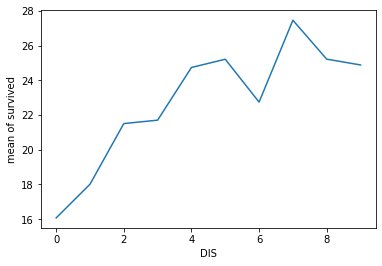

In [39]:
# feature engine does many variables in one line of code
disc = EqualFrequencyDiscretiser(
    q=10, variables=['LSTAT', 'DIS', 'RM'], return_object=True)

disc.fit(X_train)

# transform train and test
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

# the bins have a no linear relationship with the target
pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

In [40]:
# let's order the bins
enc = OrdinalCategoricalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

# we can fnd the list of encoded variables here
enc.variables

['RM', 'DIS', 'LSTAT']

In [41]:
# see a list of the re-ordered bins mappings
enc.encoder_dict_

{'RM': {0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 6: 5, 4: 6, 7: 7, 8: 8, 9: 9},
 'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 6: 4, 4: 5, 9: 6, 5: 7, 8: 8, 7: 9},
 'LSTAT': {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8, 0: 9}}

Text(0, 0.5, 'mean of survived')

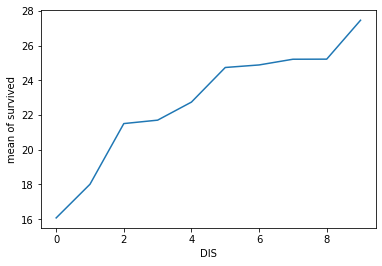

In [42]:
# let's transformt the data sets
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

# explore the monotonic relationship between bins and target
pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

## 5.4 Allocating the variable values in arbitrary intervals

- In previous sections, we have seen how to create intervals based on variable values and distribution. 
- Sometimes, however, we want to divide the variables into intervals, the boundaries of which are arbitrarily determined by the user. 
- In this section, we will learn how to discretize a variable into user pre-defined intervals using Pandas 

In [43]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

In [44]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Arbitrary interval width discretization with Pandas

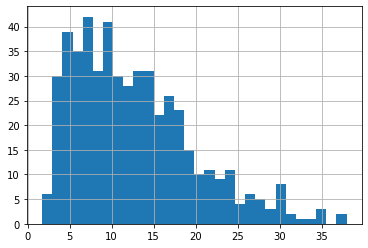

In [45]:
# let's check the value range of the variable LSTAT
data['LSTAT'].hist(bins=30)

In [46]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 10, 20, 30, np.Inf]

# bin labels - we will use with pandas cut()
labels = ['0-10', '10-20', '20-30', '>30']

# discretize LSTAT
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# let's include interval limits
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# check the original and 2 versions of the discretized variable
data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head()

,LSTAT,lstat_labels,lstat_intervals
0,4.98,0-10,"(-0.001, 10.0]"
1,9.14,0-10,"(-0.001, 10.0]"
2,4.03,0-10,"(-0.001, 10.0]"
3,2.94,0-10,"(-0.001, 10.0]"
4,5.33,0-10,"(-0.001, 10.0]"


In [47]:
# let's check the number of observations per bin
data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

## 5.5 Performing discretization with k-means clustering

- In discretization using k-means clustering, the intervals are the clusters identified by the k-means algorithm. 
- The number of clusters (k) is defined by the user. 
- The k-means clustering algorithm has two main steps. 
    - In the initialization step, k observations are chosen randomly as the initial centers of the k clusters, and the remaining data points are assigned to the closest cluster. 
    - In the iteration step, the centers of the clusters are re-computed as the average points of all of the observations within the cluster, and the observations are reassigned to the newly created closest cluster. 
- The iteration step continues until the optimal k centers are found. 
- In this section, we will perform k-means discretization with Scikit-Learn

In [48]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [49]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

#### K-means discretization with Scikit-Learn

In [51]:
# set up a k-means discretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# fit the discretizer to the train 
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

# inspect the bin boundaries 
disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.04939394, 15.50172727,
       18.91454545, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
       36.98      ]),
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
        6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
       12.1265    ]),
       array([3.561     , 3.987125  , 4.73948864, 5.3238303 , 5.77705709,
       6.14498698, 6.50479278, 6.91447956, 7.43717157, 8.1095049 ,
       8.78      ])], dtype=object)

In [52]:
# let's transform the train set, remember that it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,2.0
1,1.0,2.0,6.0
2,4.0,0.0,5.0
3,0.0,6.0,5.0
4,4.0,0.0,4.0


Text(0, 0.5, 'Number of observations per bin')

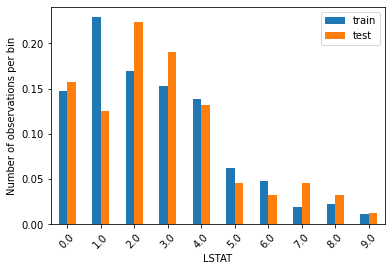

In [53]:
# do the same for the test set
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

# LSTAT: check train and test similarities 
t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

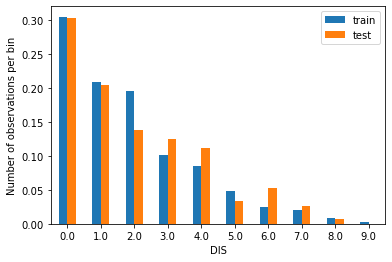

In [54]:
# DIS: check train and test similarities 
t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

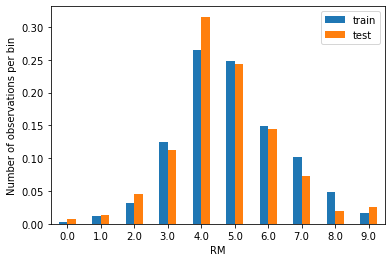

In [55]:
# RM: check train and test similarities 
t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## 5.6 Using decision trees for discretization

- Discretization with decision trees consists of using a decision tree to identify the optimal bins in which to sort the variable values. 
- The decision tree is built using the variable to discretize, and the target. 
- When a decision tree makes a prediction, it assigns an observation to one of N end leaves, therefore, any decision tree will generate a discrete output, the values of which are the predictions at each of its N leaves. 
- Discretization with decision trees creates a monotonic relationship between the bins and the target. 
- In this section, we will perform decision tree-based discretization using scikit-learn and then automate the procedure with Feature-engine.

In [56]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [57]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### Discretization using Decision Trees

In [59]:
# ex: build Regression tree using LSTAT to predict MEDV
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_model.fit(X_train['LSTAT'].to_frame(), y_train)
X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

X_train[['LSTAT', 'lstat_tree']].head(10)

,LSTAT,lstat_tree
141,34.41,12.917241
272,7.73,27.153846
135,16.96,16.361818
298,4.97,32.042857
122,17.93,16.361818
22,18.72,16.361818
68,13.09,20.555000
20,21.02,12.917241
437,26.45,12.917241
14,10.26,20.555000


In [60]:
# let's explore how many end points (the bins) the tree created
X_train['lstat_tree'].nunique()

8

In [61]:
# let's explore which end points (the predictions) the tree created
X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

Text(0, 0.5, 'MEDV')

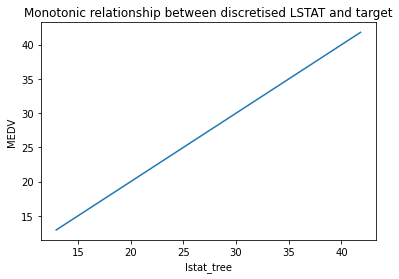

In [62]:
# monotonic relationship with target: train set
pd.concat([X_train, y_train], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

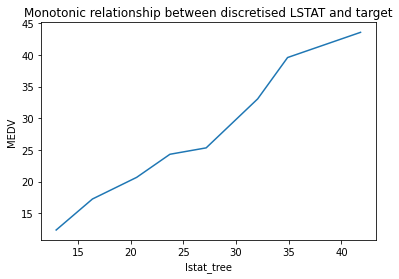

In [63]:
# monotonic relationship with target: test set
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

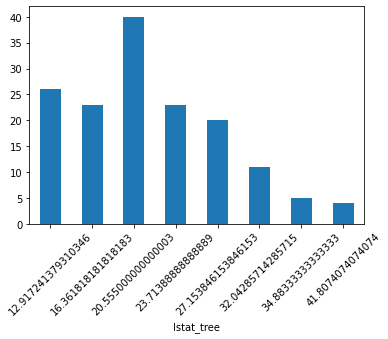

In [64]:
# plot number of observations per bin
X_test.groupby(['lstat_tree'])['LSTAT'].count().plot.bar()
plt.xticks(rotation=45)

#### Visualizing the tree: 
We can visualise the tree by 
- saving the model to a text file,
- copying and pasting the text file contents into [webgraphviz](http://webgraphviz.com/) text area
- croping and saving the image into png format
- opening the png image for visualization

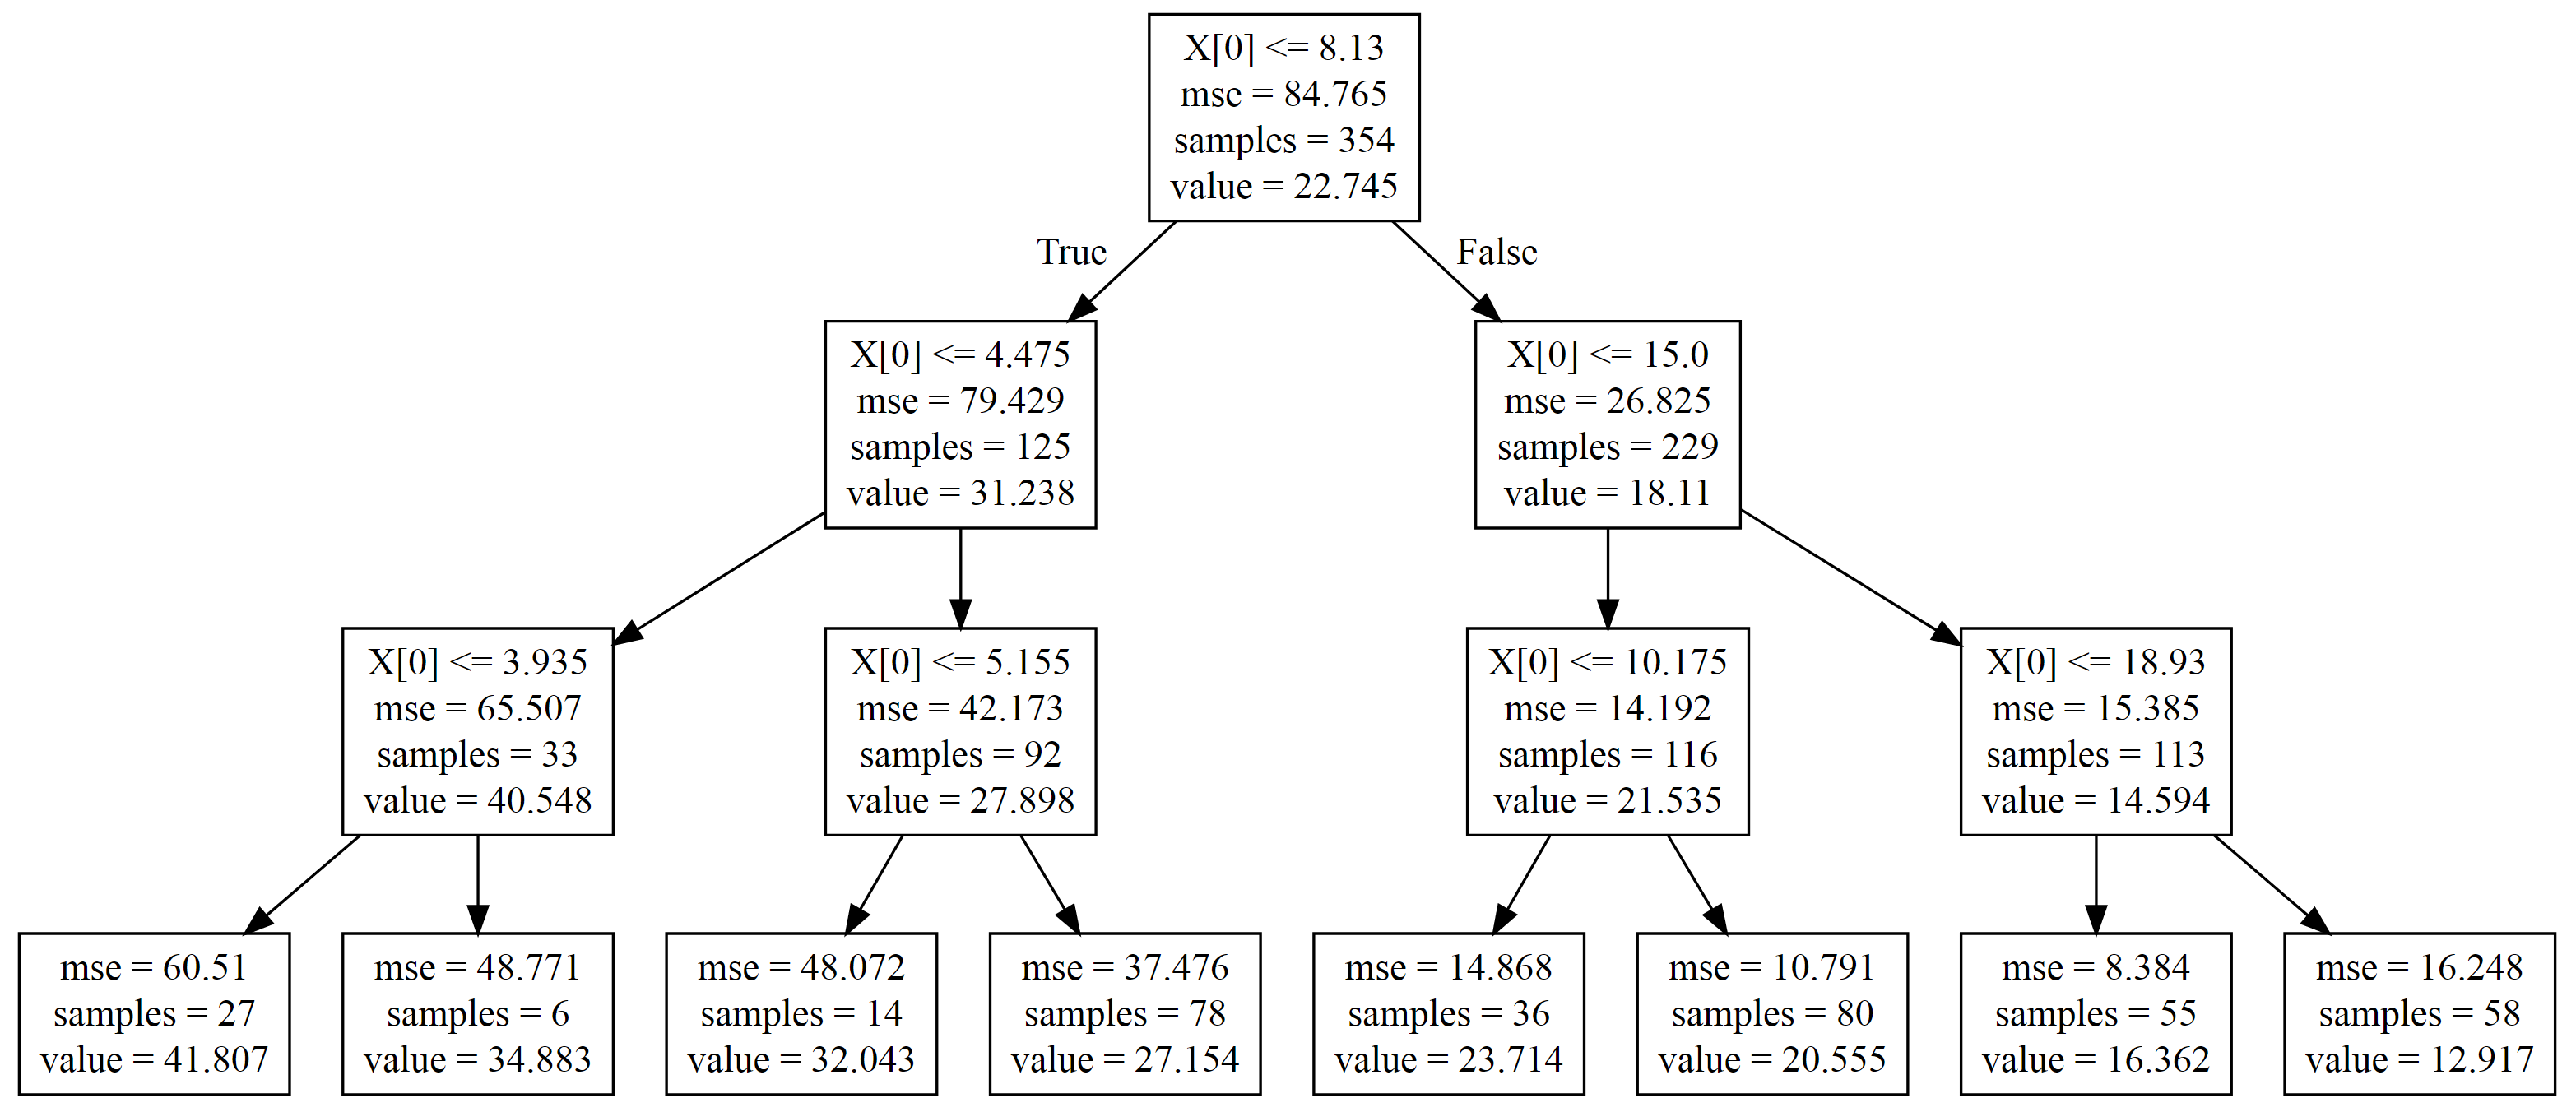

In [65]:
# saving the text file
with open("data/tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)
    
# open the image
from IPython.display import Image
PATH = "images/tree_model.png"
Image(filename = PATH , width=1000, height=1000)

#### Decision Tree with hyper-parameter tunning

In [66]:
X_train.shape, X_test.shape

((354, 14), (152, 14))

In [67]:
param_grid = {'max_depth': [1,2,3,4]}

# set up model within GridSearch 
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

# fit the grid - finds tree with optimal parameters for LSTAT
tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

Text(0, 0.5, 'Number of observations per bin')

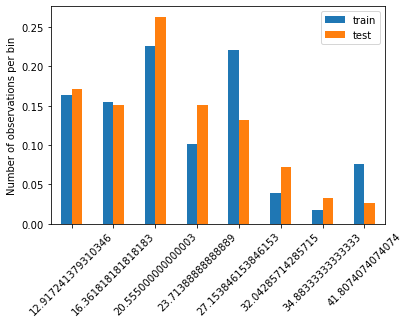

In [68]:
# find predictions / discretize the variable
X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

# determine proportion of observations in each bin
t1 = X_train['lstat_tree'].value_counts() / len(X_train)
t2 = X_test['lstat_tree'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')